We will now work on some images to manipulate them in different ways. Feel free to change differetn parameter values of the function and see how it changed the output image.

If you didn't find any image just download the input image from here: https://docs.opencv.org/4.x/lena.png 

In [1]:
## Importing necessary libraries

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Reading, writing and displaying Image

In [ ]:
## basic operation for reading an image in opencv

image = cv.imread("lena.png")

In [ ]:
## operation to display the loaded image in a window
cv.imshow("Original Image", image)

## waitkey function is used to display a window for given milliseconds or until any key is pressed
cv.waitKey(0)

In [ ]:
## basic operation for writing an image to disk
cv.imwrite('Image.jpg', image)

## Color to gray scale

In [ ]:
## get the dimensions of the image

height, width, channels = image.shape
height, width, channels

In [ ]:
## the blue, green, red color (rgb reverse) values are given at each pixel value

image[0][0]

In [ ]:
## Initialize an empty image with all zeroes or whatever value you like

gray_image = np.zeros((height, width), dtype=np.uint8)
# gray_image = np.full((height, width), 255, dtype=np.uint8)

cv.imshow("Empty Image", gray_image)
cv.waitKey(0)

#### Convert to gray by averaging

In [ ]:
for i in range(height):
    for j in range(width):
        # get rgb values from the image
        b, g, r = image[i,j]
        # calculate weighted RGB to grayscale conversion                                  
        gray_image[i,j] = int((r+g+b)/3)

cv.imshow("Gray Image", gray_image)
cv.waitKey(0)

#### Convert to gray using standard form

In [ ]:
for i in range(height):
    for j in range(width):
        # get rgb values from the image
        b, g, r = image[i,j]
        # calculate weighted RGB to grayscale conversion                                  
        gray_image[i,j] = int(0.299*r + 0.587*g + 0.114*b)

cv.imshow("Gray Image", gray_image)
cv.waitKey(0)

#### Convert using opncv

In [ ]:
gray_image = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
cv.imshow("Gray Image", gray_image)
cv.waitKey(0)

## Geometric transformations

#### Scaling the gray-scale image to half

In [ ]:
# initialise image with half the dimensions
gray_image_scaled = np.zeros((int(height/2),int(width/2)), dtype=np.uint8)

for i in range(int(height/2)):
    for j in range(int(width/2)):
        # assign pixels in multiple of 2 i.e. skipping 1 pixel
        gray_image_scaled[i,j] = gray_image[i*2,j*2]

cv.imshow('Scaled Grayscale', gray_image_scaled)
cv.waitKey(0)

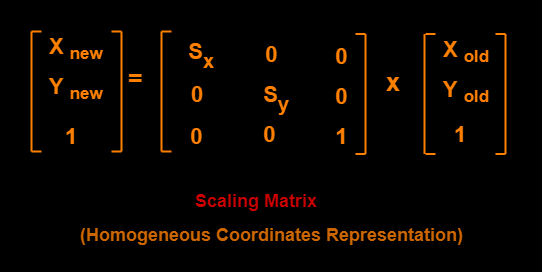

In [ ]:
image_scaled = cv.resize(gray_image, None, fx=0.75, fy=0.75)
# image_scaled = cv.resize(gray_image, (200,200), interpolation = cv2.INTER_AREA)   ## interpolation

cv.imshow('Scaled Image', image_scaled)
cv.waitKey(0)

#### Translating the gray-scale image by 50 pixel

In [ ]:
# initialize image with 50 more pixels in h and w
gray_image_trans = np.zeros((height+50, width+50), dtype=np.uint8)

# assign pixel values which are shifted by 50 pixel in each direction
gray_image_trans[50:height+50, 50:width+50] = gray_image[0:height, 0:width]

cv.imshow('Grayscale Translated', gray_image_trans)
cv.waitKey(0)

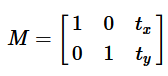

Translation Matrix

In [ ]:
M = np.float32([[1,0,100],
                [0,1,50]])
gray_image_trans = cv.warpAffine(gray_image, M, (width, height))

cv.imshow('Grayscale Translated', gray_image_trans)
cv.waitKey(0)

#### Flipping vertically and horizontally

In [ ]:
vertical_flip = cv.flip(gray_image, 0)
cv.imshow('Grayscale Vertical Flip', vertical_flip)
cv.waitKey(0)

In [ ]:
horizontal_flip = cv.flip(gray_image, 1)
cv.imshow('Grayscale Horizontal Flip', horizontal_flip)
cv.waitKey(0)

#### Rotation

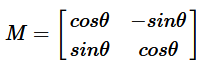
Scaled rotation with adjustable center of rotation
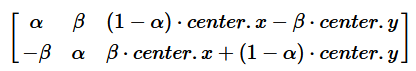
Where
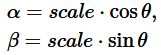

In [ ]:
# cols-1 and rows-1 are the coordinate limits. parameters: center, angle, scale
M = cv.getRotationMatrix2D(((width-1)/2.0,(height-1)/2.0), 90, 1)

In [ ]:
rotated_img = cv.warpAffine(gray_image, M, (width,height))
cv.imshow('Grayscale Rotated', rotated_img)
cv.waitKey(0)

#### Perspective transform

use this image for better effects: https://i.stack.imgur.com/hsLhe.jpg

In [ ]:
new_img = cv.imread("sudoku.jpg")
new_img = cv.cvtColor(new_img, cv.COLOR_RGB2GRAY)
cv.imshow('new image', new_img)
cv.waitKey(0)

In [ ]:
## chossing edges of the sudoku table
pts1 = np.float32([[54,61],[370, 50],[19,390],[395,395]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

In [ ]:
M = cv.getPerspectiveTransform(pts1, pts2)
perspective_image = cv.warpPerspective(new_img, M, (300,300))

In [ ]:
plt.subplot(121), plt.imshow(new_img, cmap=plt.cm.gray), plt.title('Input')
plt.subplot(122), plt.imshow(perspective_image, cmap=plt.cm.gray), plt.title('Output')
plt.show()

## Thresholding

#### Binary and Binary Inverse Thresholding

In [ ]:
_,thresh1 = cv.threshold(new_img,127,255,cv.THRESH_BINARY)
_,thresh2 = cv.threshold(new_img,127,255,cv.THRESH_BINARY_INV)

plt.subplot(121), plt.imshow(thresh1,cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(thresh2,cmap=plt.cm.gray)
plt.show()

#### Tozero and Tozero Inverse

In [ ]:
_,thresh3 = cv.threshold(new_img,127,255,cv.THRESH_TOZERO)
_,thresh4 = cv.threshold(new_img,127,255,cv.THRESH_TOZERO_INV)
plt.subplot(121), plt.imshow(thresh3,cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(thresh4,cmap=plt.cm.gray)
plt.show()

#### Adaptive Mean and Gaussian Thresholding

In [ ]:
th1 = cv.adaptiveThreshold(new_img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,15,20)
th2 = cv.adaptiveThreshold(new_img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,15,5)
plt.subplot(121), plt.imshow(th1, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(th2, cmap=plt.cm.gray)
plt.show()

## Smoothing and Sharpening Images

#### Smoothing

In [ ]:
kernel = np.ones((5,5),np.float32)/25
kernel

In [ ]:
blur_img = cv.filter2D(new_img,-1,kernel)
plt.subplot(121), plt.imshow(new_img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(blur_img, cmap=plt.cm.gray)
plt.show()

In [ ]:
blur = cv.blur(new_img,(5,5))
plt.subplot(121), plt.imshow(new_img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(blur, cmap=plt.cm.gray)
plt.show()

##### Gaussian Blur

In [ ]:
blur = cv.GaussianBlur(new_img,(7,7),0)
plt.subplot(121), plt.imshow(new_img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(blur, cmap=plt.cm.gray)
plt.show()

##### Median blur

In [ ]:
median = cv.medianBlur(th2,3)  ## useful for salt and pepper noise
plt.subplot(121), plt.imshow(th2, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(median, cmap=plt.cm.gray)
plt.show()

### Sharpening

In [ ]:
kernel = np.array([[-1,-1,-1], 
                    [-1,10,-1], 
                    [-1,-1,-1]])

In [ ]:
sharp_img = cv.filter2D(new_img,-1,kernel)
plt.subplot(121), plt.imshow(new_img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(sharp_img, cmap=plt.cm.gray)
plt.show()

## Erosion and Dialation

Use this image for better understanding: https://docs.opencv.org/4.7.0/j.png

In [ ]:
img = cv.imread("j.png")

In [ ]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(img, kernel,iterations = 1)
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(erosion, cmap=plt.cm.gray)
plt.show()

In [ ]:
kernel = np.ones((5,5),np.uint8)
dilate = cv.dilate(img, kernel,iterations = 1)
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(dilate, cmap=plt.cm.gray)
plt.show()

In [ ]:
## opening: erosion followed by dilation
opening = cv.morphologyEx(th1, cv.MORPH_OPEN, kernel)
plt.subplot(121), plt.imshow(th2, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(opening, cmap=plt.cm.gray)
plt.show()

In [ ]:
## closing: dialation follwed by erosion
closing = cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
plt.subplot(121), plt.imshow(th2, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(closing, cmap=plt.cm.gray)
plt.show()

In [ ]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel)
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(gradient, cmap=plt.cm.gray)
plt.show()

## Edge Detection

#### Laplacian and Sobel

In [ ]:
laplacian = cv.Laplacian(img, cv.CV_64F)
sobelx = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobely = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)

plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(222), plt.imshow(laplacian, cmap=plt.cm.gray)
plt.subplot(223), plt.imshow(sobelx, cmap=plt.cm.gray)
plt.subplot(224), plt.imshow(sobely, cmap=plt.cm.gray)
plt.show()

#### Canny Edge Detector

In [ ]:
edges = cv.Canny(img,100,200)
plt.subplot(121), plt.imshow(img, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(edges, cmap=plt.cm.gray)
plt.show()

## Contour

In [ ]:
plt.subplot(221), plt.imshow(img, cmap=plt.cm.gray)

edges = cv.Canny(img,100,200)
plt.subplot(222), plt.imshow(edges, cmap=plt.cm.gray)

contours, hierarchy = cv.findContours(edges, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
print("Number of contours found: ", len(contours))
cv.drawContours(img, contours, -1, (0,255,0), 3)

plt.subplot(223), plt.imshow(img, cmap=plt.cm.gray)
plt.show()

## Hough Transform

In [ ]:
## indtify straight lines in the image in the form of ρ=xcosθ+ysinθ instead of y=mx+c
img = cv.imread('sudoku.jpg')
gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
edges = cv.Canny(gray,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
plt.subplot(121), plt.imshow(edges, cmap=plt.cm.gray)
plt.subplot(122), plt.imshow(img, cmap=plt.cm.gray)
plt.show()

## References

1. https://docs.opencv.org/4.7.0/d2/d96/tutorial_py_table_of_contents_imgproc.html
2. https://docs.opencv.org/4.7.0/da/d6e/tutorial_py_geometric_transformations.html
3. https://docs.opencv.org/4.7.0/d7/d4d/tutorial_py_thresholding.html
4. https://docs.opencv.org/4.7.0/d4/d13/tutorial_py_filtering.html
5. https://docs.opencv.org/4.7.0/d9/d61/tutorial_py_morphological_ops.html
6. https://docs.opencv.org/4.7.0/d5/d0f/tutorial_py_gradients.html
7. https://docs.opencv.org/4.7.0/da/d22/tutorial_py_canny.html
8. https://docs.opencv.org/4.7.0/d4/d73/tutorial_py_contours_begin.html
9. https://docs.opencv.org/4.7.0/d6/d10/tutorial_py_houghlines.html
